# Question No. 1: (Data Analysis)

In [1]:
!pip install pandas
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import numpy as np
import pandas as pd

In [4]:
X = np.load("data/images.npy")#read images
X = X/255

In [3]:
Y = pd.read_csv('data/counts.csv')#read cell counts
F = np.loadtxt('data/split.txt')#read fold information

In [6]:
# cell_names_dict = {'neutrophil':0, 'epithelial':1, 'lymphocyte':2, 'plasma':3, 'eosinophil':4, 'connective':5}
cell_names_list = ['neutrophil', 'epithelial', 'lymphocyte', 'plasma', 'eosinophil', 'connective']

#### i. How many examples are there in each fold?

In [6]:
for fold_val in np.unique(F):
    print('Number of examples in fold '+str(int(fold_val))+': '+str(len(np.where(F==fold_val)[0])))
print('Total number of examples:',len(F))

Number of examples in fold 1: 1622
Number of examples in fold 2: 1751
Number of examples in fold 3: 1608
Total number of examples: 4981


#### ii. Show some image examples using plt.imshow. Describe your observations on what you see in the images and how it correlates with the cell counts of different types of cells especially T3 cells.

In [6]:
import random
import matplotlib.pyplot as plt

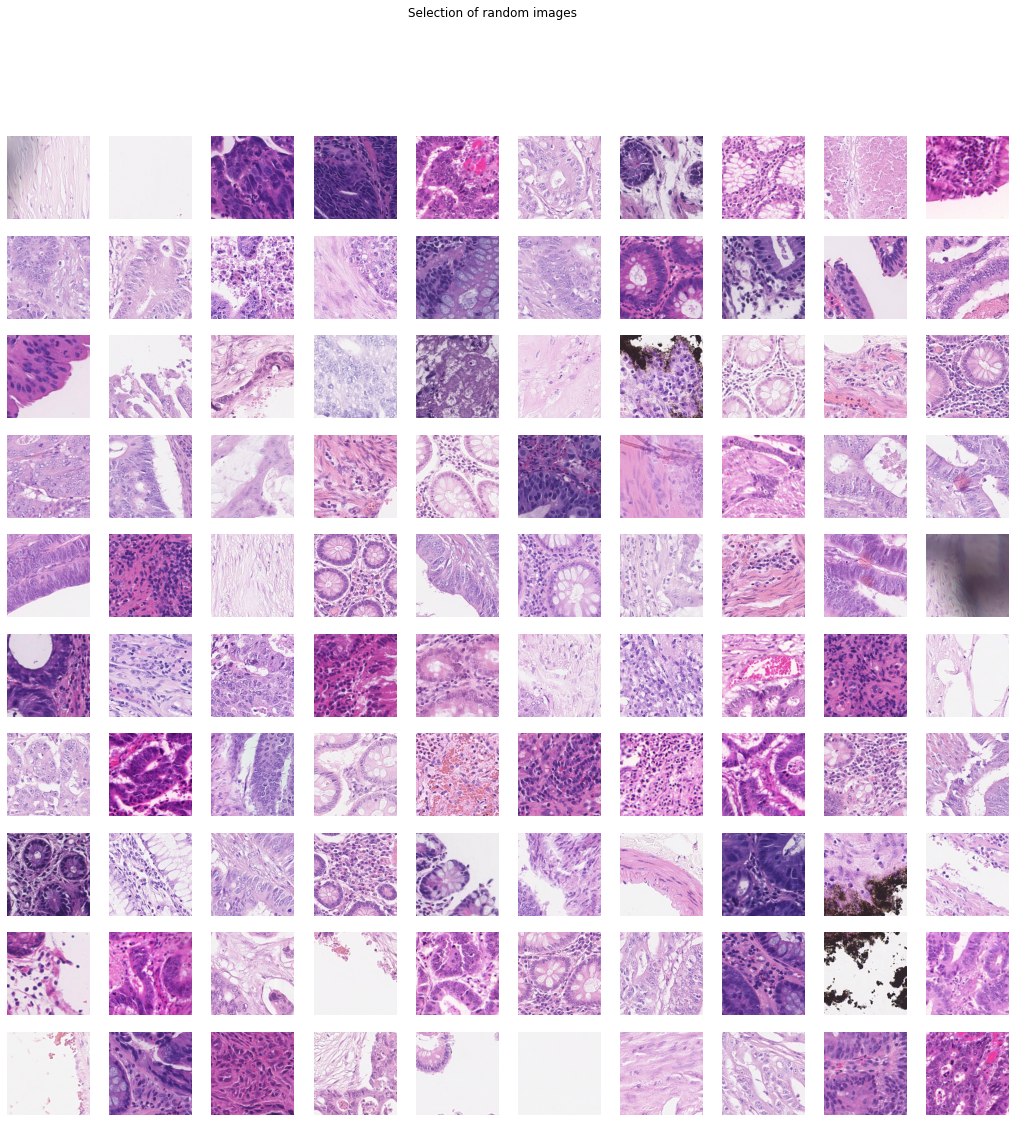

In [8]:
randomindexes = random.sample(range(len(X)), 100)
fig = plt.figure(figsize=(18,18))
fig.suptitle('Selection of random images')
for x in range(100):
    plt.subplot(10,10,x+1)
    plt.axis('off')
    plt.imshow(X[randomindexes[x]])
plt.show()

In [9]:
image_comparison_dict = {}
num_images = 3

for column in Y.columns:
    index_list = np.argpartition(Y[column], -num_images)[-num_images::]
    image_comparison_dict[column] = index_list[::-1]

In [10]:
extreme_examples_dict = {}

for key in image_comparison_dict:
    extreme_examples_dict[key] = list(image_comparison_dict[key])[0]

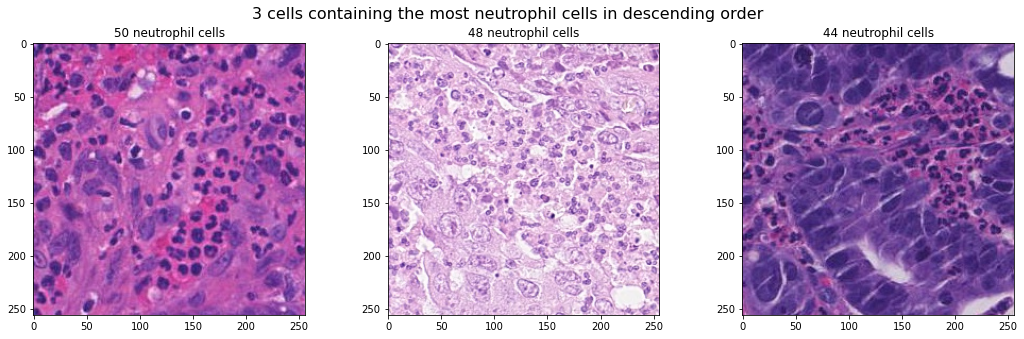

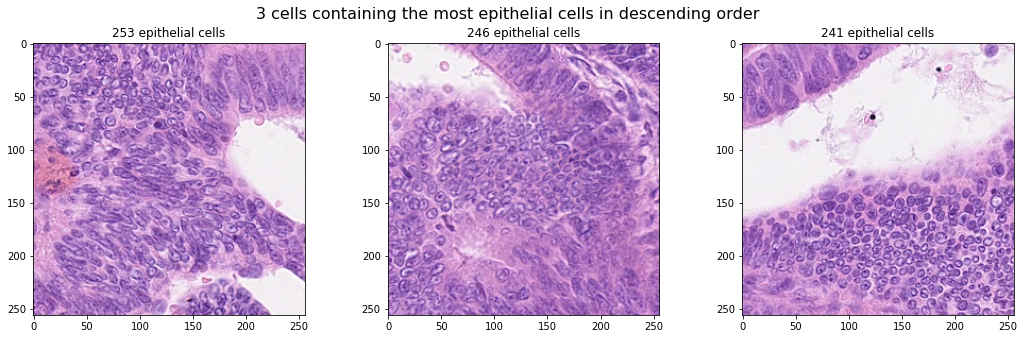

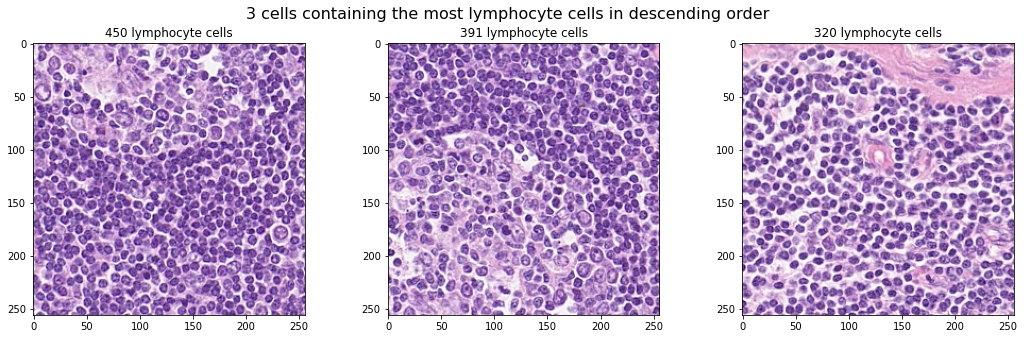

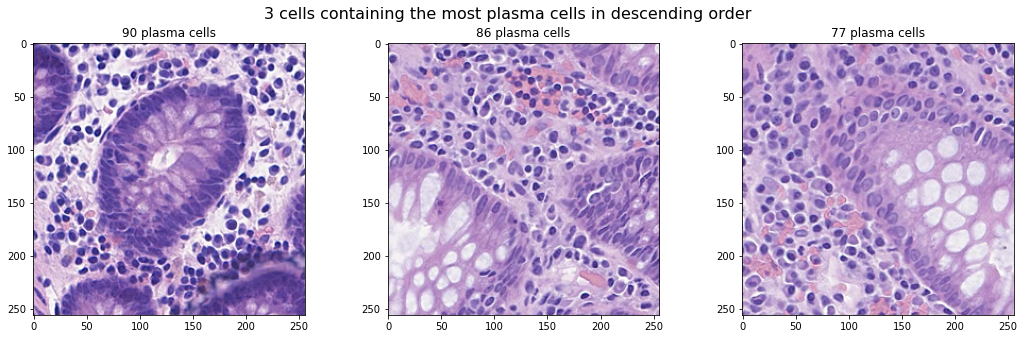

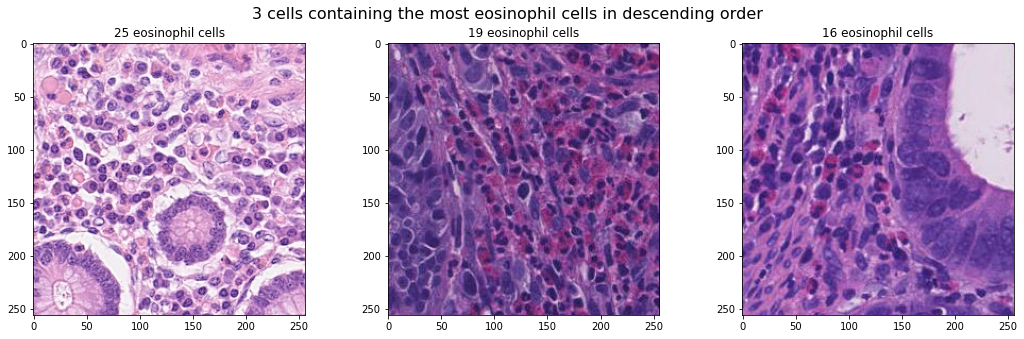

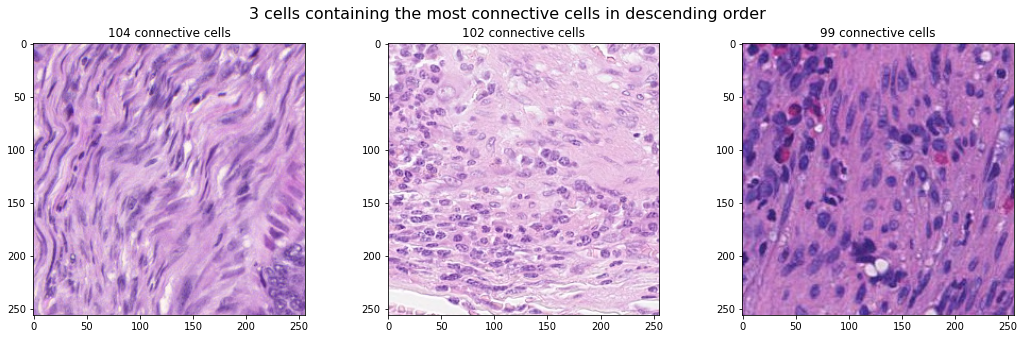

In [11]:
for key in image_comparison_dict:
    i=1
    fig = plt.figure(figsize=(18,5))
    fig.suptitle(str(len(image_comparison_dict[key]))+' cells containing the most '+str(key)+' cells in descending order', fontsize=16)
    for index in image_comparison_dict[key]:
        plt.subplot(1,len(image_comparison_dict[key]),i)
        plt.imshow(X[index])
        plt.title(str(Y[key].iloc[index])+' '+str(key)+' cells')
        i+=1
    plt.show()

For images containing many lymphocyte cells, the images appear to have a very high density of small, circular, solid purple dots showing a large nuclei with little cytoplasm and very few other features in the image (the image appears very homogeneous). 

For images containing many neutrophil cells, the structure of the image the features that indicate many neutrophil cells seems to be a 'splodgy' light purple shape suggesting that the nucleus is multi-lobed does not take up a large proportion of the cell's volume. These images are not very homogeneous, suggesting neutrophil cells in high counts accompany other cells.

For image containing many epithelial cells, the images seem to be of a larger structure made up from these individual cells. The cells are smeared, with a very light purple colour suggesting that the nucleus does not take up a large proportion of the cells volume.

For images containig many plasma cells, they have ovoid cell shape with a large nucleus taking up much of the cell's volume.

For images containig many eosinophil cells, they have a bilobed nucleus surrounded by cytoplasm and seem to be commonly seen around other cellular structures.

For images containig many connective cells, they have a non-regular structure with the image showing the most connective cells having a very smeared appearance while the second-most has a more regular structure. They are distinctive in their non-regular structure and small nucleus.

#### iii. For each fold, plot the histogram of counts of each cell type separately (6 plots in total). How many images have counts within each of the following bins?

0, 1-5, 6-10, 11-20, 21-20, 31-40, 41-50, >50

In [4]:
def input_image_fold_designator(images,return_param = 2):
    F = np.loadtxt('data/split.txt')#read fold information
    fold1_indexes = np.where(F==1)[0]
    fold2_indexes = np.where(F==2)[0]
    fold3_indexes = np.where(F==3)[0]

#     Xtrain = [X[index] for index in fold1_indexes]
#     Xval = [X[index] for index in fold2_indexes]
#     Xtest = [X[index] for index in fold3_indexes]

    X_fold1 = np.array([images[index] for index in fold1_indexes])
    X_fold2 = np.array([images[index] for index in fold2_indexes])
    X_fold3 = np.array([images[index] for index in fold3_indexes])
    
    if return_param == 0:
        return (X_fold1,X_fold2,X_fold3)

#     folds = [Xtrain,Xval,Xtest]
    folds_indices = [fold1_indexes,fold2_indexes,fold3_indexes]

    Y_fold1 = Y.iloc[fold1_indexes]
    Y_fold2 = Y.iloc[fold2_indexes]
    Y_fold3 = Y.iloc[fold3_indexes]
    if return_param == 1:
        return (X_fold1,X_fold2,X_fold3),(Y_fold1,Y_fold2,Y_fold3)
    if return_param == 2:
        return (X_fold1,X_fold2,X_fold3),(Y_fold1,Y_fold2,Y_fold3),folds_indices

In [5]:
fold1_indexes = np.where(F==1)[0]
fold2_indexes = np.where(F==2)[0]
fold3_indexes = np.where(F==3)[0]

# Xtrain = [X[index] for index in fold1_indexes]
# Xval = [X[index] for index in fold2_indexes]
# Xtest = [X[index] for index in fold3_indexes]

# X_fold1 = Xtrain
# X_fold2 = Xval
# X_fold3 = Xtest

# folds = [Xtrain,Xval,Xtest]
folds_indices = [fold1_indexes,fold2_indexes,fold3_indexes]

Yfold1 = Y.iloc[fold1_indexes]
Yfold2 = Y.iloc[fold2_indexes]
Yfold3 = Y.iloc[fold3_indexes]

In [14]:
(Xfold1,Xfold2,Xfold3),(Yfold1,Yfold2,Yfold3),folds_indices = input_image_fold_designator(X)

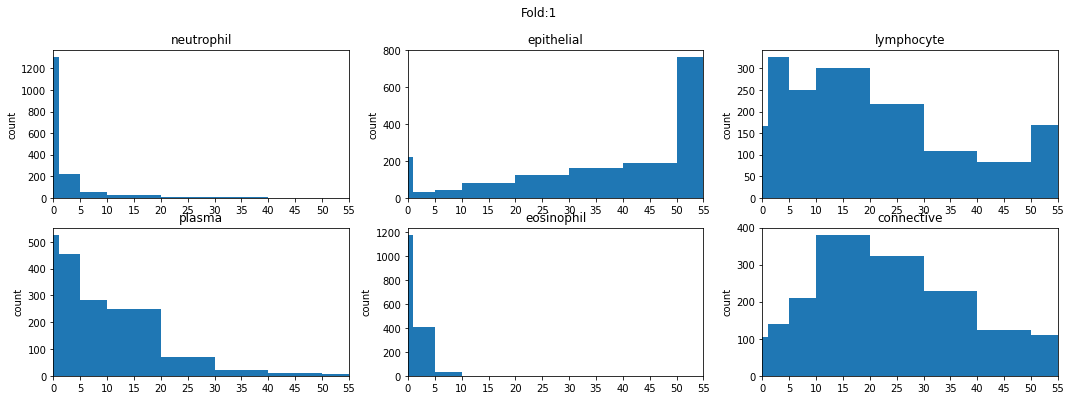

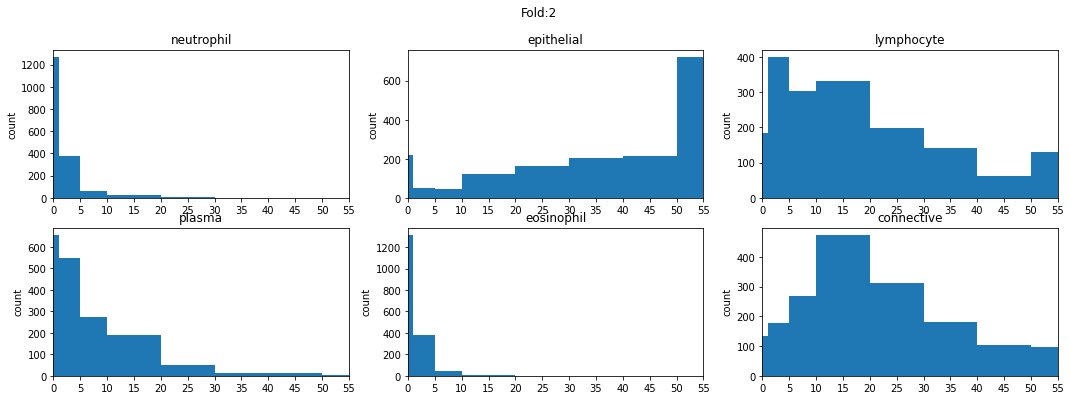

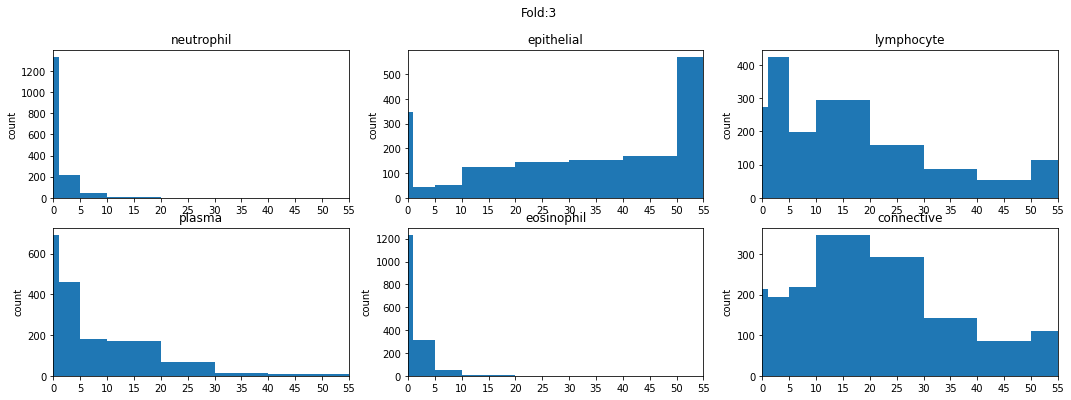

In [15]:
bins = [0,1,5,10,20,30,40,50,60]
for x in range(3):
    i=1
    fig = plt.figure(figsize=(18,6))
    fig.suptitle('Fold:'+str(x+1))
    a=0
    y = Y.iloc[folds_indices[x]]
    for column in Y.columns:
#         print(column)
        np_y = y[column]
        plt.subplot(2,3,i)
        
        _, bins, patches = plt.hist(np.clip(np_y, bins[0], bins[-1]), bins=bins)
        plt.xlim([0, 20])
#         plt.xticks(10 * np.arange(len(bins)))# + 12.5)
        plt.xticks(np.arange(0,60,5))
        plt.ylabel('count')
        
#         plt.hist(np_y,bins)
        
        plt.title(column)
        i += 1
        
#         print(np.sum(_))
    plt.show()

In [16]:
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec

# fig = plt.figure(figsize=(20, 30))
# outer = gridspec.GridSpec(3, 3, wspace=0.2, hspace=0.2)

# for i in range(9):
#     inner = gridspec.GridSpecFromSubplotSpec(2, 1,
#                     subplot_spec=outer[i], wspace=0.1, hspace=0.1)

#     for j in range(2):
#         ax = plt.Subplot(fig, inner[j])
# #         t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (int(2*i+j)%6,1))
# #         t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i, j))
# #         print((2*i+j)%6)
#         column = cell_names_list[int(2*i+j)%6]
#         np_y = y[column]
#         N, bins, patches = ax.hist(np.clip(np_y, bins[0], bins[-1]), bins=bins)
# #         xlabels = bins[:-1].astype(str)
# #         xlabels[-1] += '+'
#         xlabels = ['0','10', '20', '30', '40', '50+']
#         xlabels = np.arange(0, 60, 5)
# #         xlabels = ['0','5','10','15','20','25','30','35','40','45','50','55']
# #         xlabels = np.arange(0,60,10)
#         ax.set_xticks(xlabels)
# #         ax.set_xticklabels(xlabels)
# #         ax.set_xticks([])
# #         ax.set_yticks([])
#         ax.set_xlim([0, 60]) # 0 to 60
#         fig.add_subplot(ax)



In [17]:
# bins = [0,1,5,10,20,30,40,50,np.inf]
# for x in range(len(folds)):
#     fold = folds[x]
#     i=1
#     fig = plt.figure(figsize=(18,6))
#     fig.suptitle('Fold:'+str(x+1))
#     a=0
#     for column in Y.columns:
#         np_Y = np.array(Y[column])
#         hist, bin_edges = np.histogram(np_Y,bins)
#         plt.subplot(2,3,i)
#         plt.bar(['0','1-5','6-10','11-20','21-20','31-40','41-50','>50'],hist,width=1)
#         plt.title(column)
#         i += 1
#     plt.show()

#### iv. Pre-processing: Convert and show a few images from RGB space to HED space and show the H-channel which should indicate cellular nuclei. For this purpose, you can use the color separation notebook available here: https://scikitimage.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html

In [9]:
from skimage.color import rgb2hed, hed2rgb

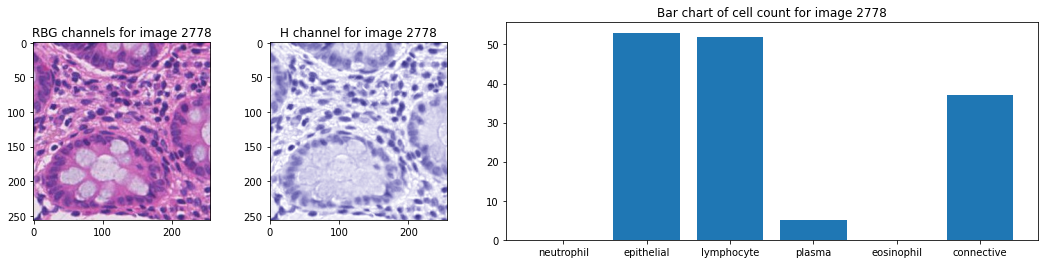

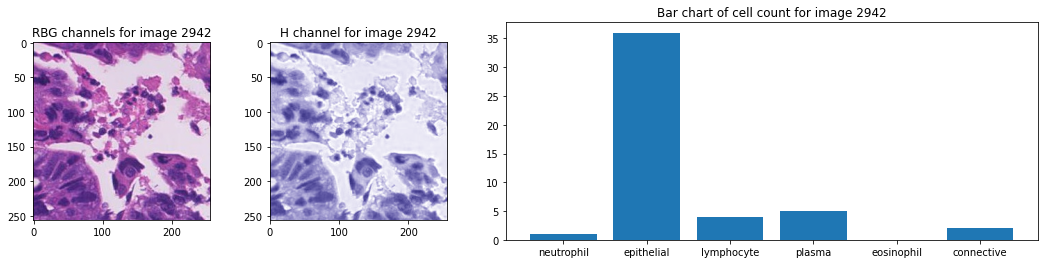

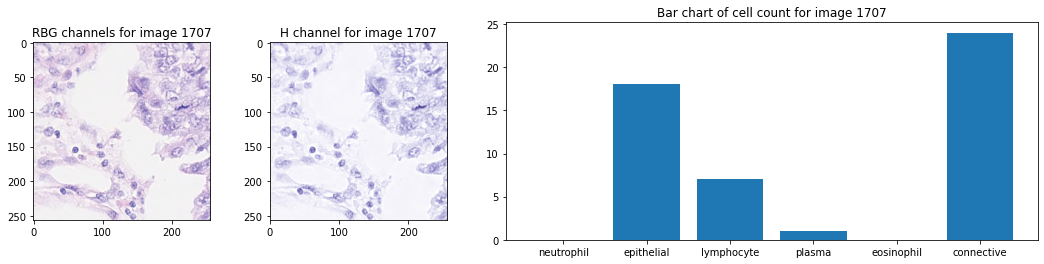

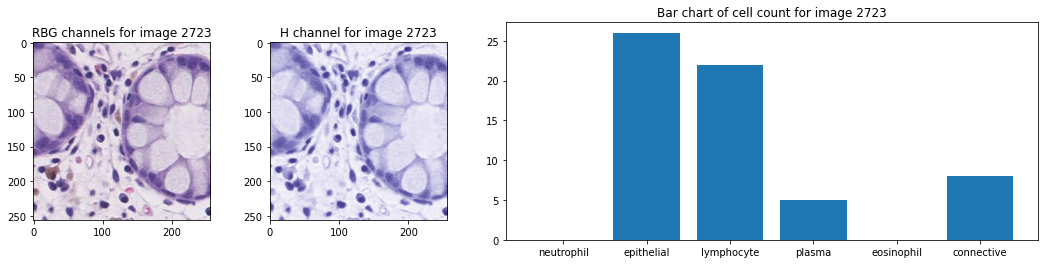

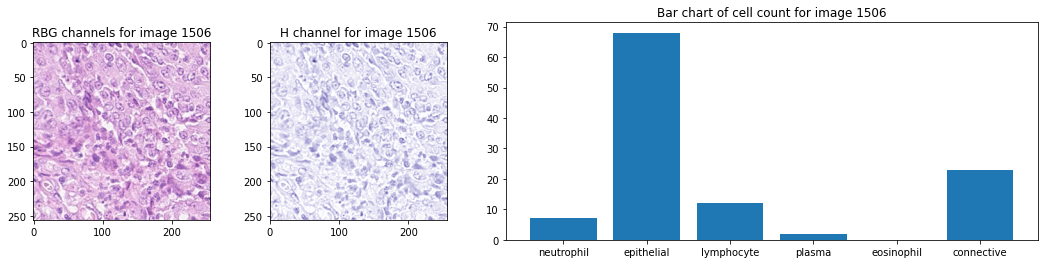

In [19]:
num_images = 5
randomindexes = random.sample(range(len(X)), num_images)
for i in range(num_images):
    im = X[randomindexes[i]]
#     fig = plt.figure(figsize=(18,18))
#     fig.suptitle('Index: '+str(randomindexes[i]+1))
    f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1,1,3]},figsize=(18,4))
    a0.imshow(im)
    a0.title.set_text('RBG channels for image '+str(randomindexes[i]))
    im_hed = rgb2hed(im)
    null = np.zeros_like(im_hed[:, :, 0])
    im_h = hed2rgb(np.stack((im_hed[:, :, 0], null, null), axis=-1))
#     im_e = hed2rgb(np.stack((null, im_hed[:, :, 1], null), axis=-1))
#     im_d = hed2rgb(np.stack((null, null, im_hed[:, :, 2]), axis=-1))
    a1.imshow(im_h)
    a1.title.set_text('H channel for image '+str(randomindexes[i]))
    a2.bar(Y.columns,list(Y.loc[randomindexes[i]]))
    a2.title.set_text('Bar chart of cell count for image '+str(randomindexes[i]))

#### v. Do a scatter plot of the average of the H-channel for each image vs. its cell count of a certain type for images in Fold-1 (6 plots in total). Do you think this feature would be useful in your regression model? Explain your reasoning.

In [20]:
avg_h_list = []
for im in Xfold1:
    im_hed = rgb2hed(im)
    im_h = im_hed[:,:,0]
#     null = np.zeros_like(im_hed[:, :, 0])
#     im_h = hed2rgb(np.stack((im_hed[:, :, 0], null, null), axis=-1))
    avg_h_list.append(np.mean(im_h))

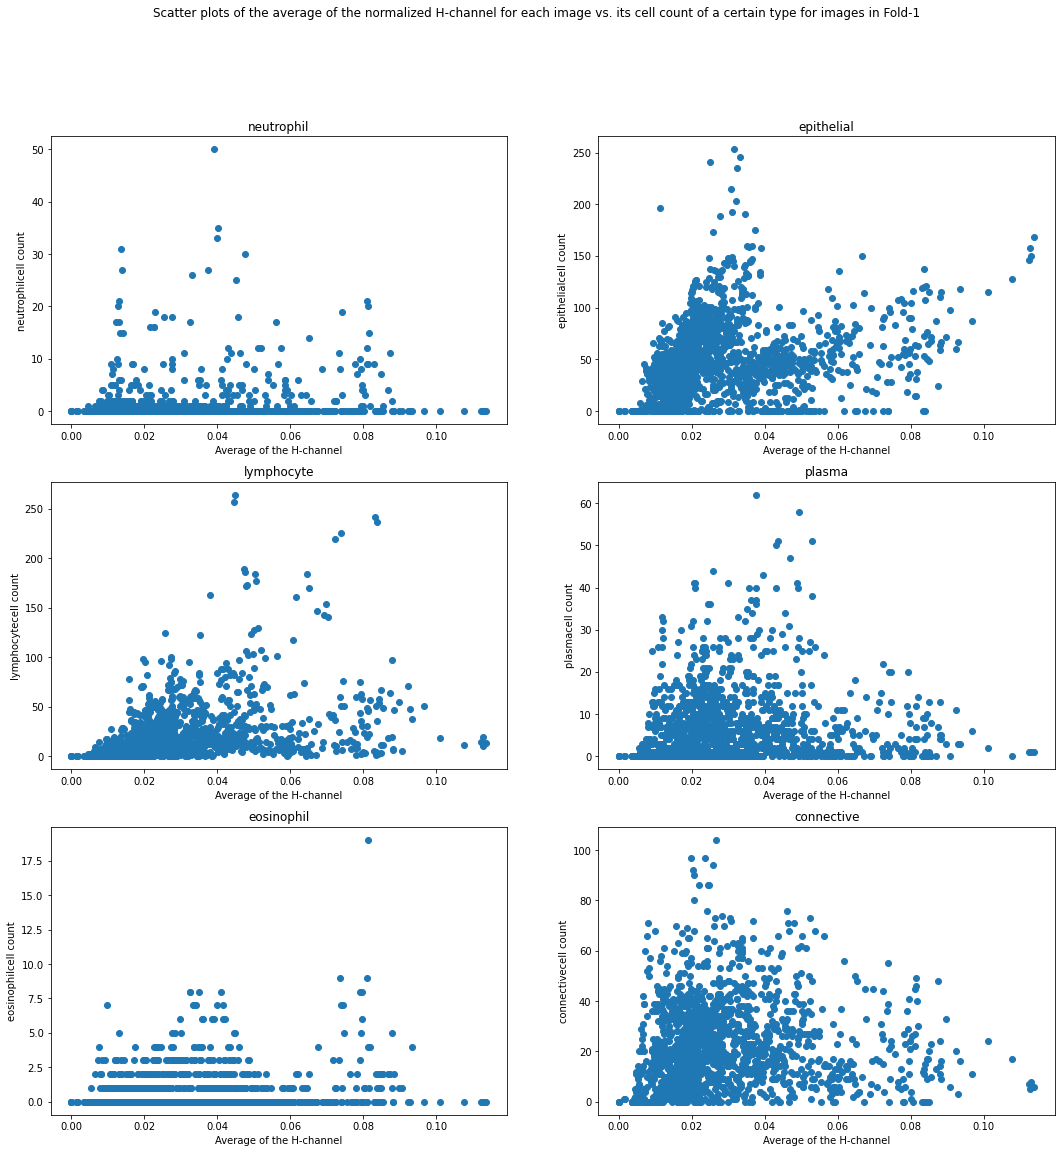

In [21]:
# navg_h_list = [np.mean(hed2rgb(np.stack((rgb2hed(fold_X[i]), null, null), axis=-1))) for i in range(len(fold_X))]

fig = plt.figure(figsize=(18,18))
fig.suptitle('Scatter plots of the average of the normalized H-channel for each image vs. its cell count of a certain type for images in Fold-1')
for i in range(len(Y.columns)):
    cell_type = Y.columns[i]
    cell_count = Yfold1[cell_type]
    plt.subplot(3,2,i+1)
    plt.scatter(avg_h_list,cell_count)
    plt.title(cell_type)
    plt.xlabel('Average of the H-channel')
    plt.ylabel(str(cell_type) + 'cell count')
plt.show()

It is hard to tell from these plots if this feature will be useful for the regression model. There may be better features. However, these plots are not indicative of a good feature as there is little correlation between a change in average H-channel of an image and the cell count. 

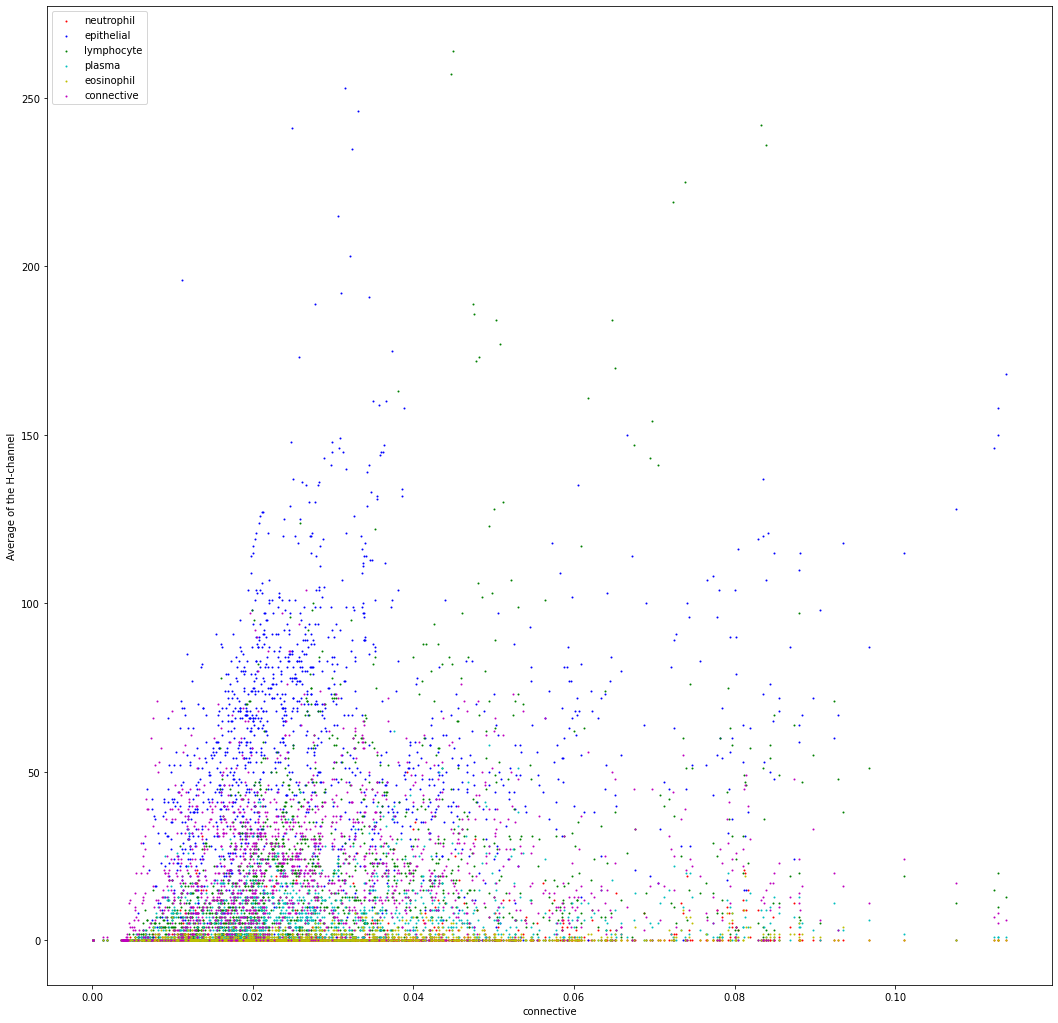

In [22]:
colour_list = ['r','b','g','c','y','m']
cell_colour_dict = {cell_names_list[i]:colour_list[i] for i in range(len(colour_list))}
fig = plt.figure(figsize=(18,18))
# ax1 = fig.add_subplot()
# navg_h_list = [np.mean(hed2rgb(np.stack((rgb2hed(fold_X[i]), null, null), axis=-1))) for i in range(len(fold_X))]

for i in range(len(Y.columns)):
    cell_type = Y.columns[i]
    cell_count = Yfold1[cell_type]
    plt.scatter(avg_h_list,cell_count,s=1, c=cell_colour_dict[cell_type], label=cell_type)
    plt.xlabel(cell_type)
    plt.ylabel('Average of the H-channel')
#     ax1.scatter(x[:4], y[:4], s=10, c='b', marker="s", label='first')
#     ax1.scatter(x[40:],y[40:], s=10, c='r', marker="o", label='second')
    plt.legend(loc='upper left');
plt.show()

The average of the H channel will not be a very useful feature for the regression model as it is clear that there is large variance in the data for each cell count when plotted against the average of the channel.

#### vi. What performance metrics can you use for this problem? Which one will be the best
performance metric for this problem? Please give reasoning.

The performance metrics should indicate how close the predictions are to the expected values. Commonly used error metrics for regression models are mean squared error, root mean squared error and mean absolute error, but there are many more. MSE (or RMSE) will be good metrics for a baseline evaluation of a regression scheme. MAE could also be used, with is being linear larger errors are punished less than MSE OR RMSE. In our problem the correlation coefficients are very low, therefore I think R2 score will be the best performance metric as it will indicate whether the regression model is performing better than a mean line (R2 > 0). Unlike MSE, RMSE or MAE this gives us an indication as to whether regression is a good approach for this task not just how much better our regression model is than a previous one.